In [87]:
import numpy as np
import pandas as pd
import talib
import matplotlib.pyplot as plt
from talib import abstract
import mplfinance as mpf
#import goo_doc_api as goo
#import yfinance as yf
#import pandas_datareader as web
import matplotlib
#matplotlib.use('ps')
from matplotlib import rc
#rc('text',usetex=True)
# rc('text.latex', preamble='\usepackage{color}')
import matplotlib.pyplot as plt

import datetime
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
import io
import sklearn
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import math
import os


In [88]:
#from multiprocessing import Pool
cwd = os.getcwd()    
dir_path = os.path.join(cwd, r"stock_market_data\nasdaq\csv"+'\\')
#stock_list = np.array([f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))])
stock_list = np.array(os.listdir(dir_path))
stock_list = stock_list
tickers_train ,tickers_test = train_test_split(stock_list,test_size=0.2)  
#tickers=["AAPL"] # ,"CS"

# def read_csv(Stock_Name):
# 	df = pd.read_csv(dir_path+str(Stock_Name)+".csv", parse_dates=['Date'], dayfirst=True)
# 	df.set_index('Date', inplace=True)
# 	df=df[:'20240101']
# 	return df


# with Pool(processes=8) as pool: # or whatever your hardware can support

# 	# have your pool map the file names to dataframes
# 	df_list = pool.map(read_csv, tickers_train)

# 	# reduce the list of dataframes to a single dataframe
# 	df = pd.concat(df_list, ignore_index=True)

df_list = []
for i in ['AAPL.csv']:#tickers_train:

	# download stock price data
	Stock_Name= i
	symbol = i
	tickers = symbol
	#df = yf.download(symbol, period='6mo')
	#dir_path = r"C:\D\Ryan\TAMU_class\STAT654\Project\stock_market_data\nasdaq\csv"+'\\'
	#df = pd.read_csv(dir_path+str(Stock_Name)+".csv", parse_dates=['Date'], dayfirst=True)
	df = pd.read_csv(dir_path+str(Stock_Name), parse_dates=['Date'], dayfirst=True)
	
	#df= pd.read_csv(dir_path+str(Stock_Name)+".csv")  # C:\D\Ryan\TAMU_class\STAT654\Project\stock_market_data\nasdaq\csv
	# current_price = web.get_quote_yahoo(tickers)["regularMarketPrice"]
	# print(current_price)
	df.set_index('Date', inplace=True)
	df=df[:'20240101']  # '20100101'
	df_list.append(df)

#df = pd.concat(df_list, ignore_index=True)
	#df.reset_index(inplace=True)
	# Add MACD as subplot


	#macd = MACD(df, 12, 26, 9)
	#stochastic = Stochastic(df, 14, 3)

In [95]:
df

Low        Open      Volume        High       Close  \
Date                                                                     
1980-12-17    0.115513    0.115513  86441600.0    0.116071    0.115513   
1980-12-18    0.118862    0.118862  73449600.0    0.119420    0.118862   
1980-12-19    0.126116    0.126116  48630400.0    0.126674    0.126116   
1980-12-22    0.132254    0.132254  37363200.0    0.132813    0.132254   
1980-12-23    0.137835    0.137835  46950400.0    0.138393    0.137835   
...                ...         ...         ...         ...         ...   
2022-12-06  141.919998  147.070007  64727200.0  147.300003  142.910004   
2022-12-07  140.000000  142.190002  69721100.0  143.369995  140.940002   
2022-12-08  141.100006  142.360001  62128300.0  143.520004  142.649994   
2022-12-09  140.899994  142.339996  76069500.0  145.570007  142.160004   
2022-12-12  141.070007  142.699997  21904917.0  143.000000  142.320007   

            Adjusted Close  Volume_ratio  
Date                                      
1980-12-17        0.089886     -0.087467  
1980-12-18        0.092492     -0.070733  
1980-12-19        0.098137     -0.179082  
1980-12-22        0.102913     -0.114464  
1980-12-23        0.107256      0.099195  
...                    ...           ...  
2022-12-06      142.910004     -0.026668  
2022-12-07      140.940002      0.032277  
2022-12-08      142.649994     -0.050075  
2022-12-09      142.160004      0.087921  
2022-12-12      142.320007     -0.540669  

[10587 rows x 7 columns]

### cut the data window

In [127]:
def sliding_window_iter_array(array, window_size, step_size,future_prediction_days=120):
	"""series is a column of a dataframe"""
	print(array.shape)
	for start_row in range((array.shape[0] -window_size )//step_size  +1 - math.ceil(future_prediction_days/step_size ) ):  ## cannot plus 2  , 10 means upto 10 days return
		#print(start_row)
		#print(array["Adjusted Close"])
		raw_data=array[["Adjusted Close","Volume_ratio"]][start_row* step_size   : start_row* step_size      + window_size  ].to_numpy()
		#print(raw_data)

		raw_data_future=array["Adjusted Close"][start_row* step_size  + window_size    :   start_row* step_size  + window_size+future_prediction_days].iloc[[0,4,9,119]].to_numpy()
		raw_data_future_date=array["Adjusted Close"][start_row* step_size  + window_size    :   start_row* step_size  + window_size+future_prediction_days].iloc[[0,4,9,119]].index.to_numpy()
		#raw_data_future=array[start_row* step_size  + window_size    :   start_row* step_size  + window_size+future_prediction_days]
		#print(len(raw_data_future_date))

		# normalized stock price    volume    divdie the last day price as the return percentage        date of the future price 
		yield (raw_data[:,0]-raw_data[:,0].min(axis = 0))/(raw_data[:,0].max(axis = 0)-raw_data[:,0].min(axis = 0))  ,raw_data[:,1]  ,raw_data_future/(raw_data[-1,0]) ,raw_data_future_date
 
		
		 #, raw_data_future/(raw_data[-1]) 
				  # 


def sliding_window_iter_array_for_y(array, window_size, step_size,future_prediction_days=120):
	"""series is a column of a dataframe"""
	for start_row in range((array.shape[0] -window_size )//step_size  +1 - math.ceil(future_prediction_days/step_size ) ):  ## cannot plus 2  , 10 means upto 10 days return
		
		raw_data=array[start_row* step_size   : start_row* step_size      + window_size  ]
		
		#raw_data_future=array[start_row* step_size  + window_size    :   start_row* step_size  + window_size+future_prediction_days]
		raw_data_future=array[start_row* step_size  + window_size    :   start_row* step_size  + window_size+future_prediction_days]

		# normalized stock price    volume     1D,5D 10D return percentage as prediction target
		yield raw_data_future/(raw_data[-1])  # divdie the last day price as the return percentage 


		#yield (raw_data-raw_data.min(axis = 0))/(raw_data.max(axis = 0)-raw_data.min(axis = 0))
		#yield raw_data
# 'C': [0, 1, 2, None, 4]},
# df = pd.DataFrame({'A': list(range(100, 501, 100)),
#                    'B': list(range(-20, -15)),},
				   
#                   index=pd.date_range('2021-01-01', periods=))

df = df_list[0]
df['Volume'][df['Volume']==0] = 0.0000001
df['Volume_ratio'] = df['Volume'].div(df['Volume'].shift(1))
#print(df['Volume_diff'][df['Volume_diff']>0])
df['Volume_ratio'] = np.log10(df['Volume_ratio'])
df.dropna(inplace=True)
df.reset_index(drop=True)
# 238 rows × 6 columns
#slice_array=np.array(list(sliding_window_iter_array(df[['Adjusted Close']].to_numpy(), 120,5))) ## remove timestamp
#slice_array=np.array(list(sliding_window_iter_array(df[['Volume_ratio']].to_numpy(), 120,5))) ## remove timestamp
slice_array = list(sliding_window_iter_array(df[['Adjusted Close', 'Volume_ratio']], 120,5,120)) ## remove timestamp


#slice_array_y= list(sliding_window_iter_array_for_y(df[['Adjusted Close']] .to_numpy(), 120,5))) 

#slice_list
print(slice_array)
#slice_array = np.transpose(slice_array, (0, 2, 1))
#print(slice_array_y.shape)
#slice_array_y = slice_array_y.squeeze()
#print(slice_array_y.shape)



#timeless_slice_data=[x.reset_index(drop=True) for x in slice_data]
#print(len(slice_array))
#print(slice_array.shape)  ## check the length of the last window
#print(slice_array_y)
#np.save('AAPL_slice.npy', slice_array)
#timeless_slice_data
## concat list to dataframe  to mulitpe columns and drop index 

#df_window=pd.concat(timeless_slice_data, axis=1)
# df_rolling = df_list[0].rolling(120, min_periods=120, step=5)
# print(type(df_rolling))
# print([len(window) for window in df_rolling])


(10558, 2)
[(array([0.71740952, 0.57609331, 0.43479648, 0.5217488 , 0.60870019,
       0.60870019, 0.61956928, 0.48914098, 0.48914098, 0.41305906,
       0.3913013 , 0.3369568 , 0.3913013 , 0.48914098, 0.3478257 ,
       0.22826761, 0.26087431, 0.18479089, 0.31521918, 0.3478257 ,
       0.42392777, 0.43479648, 0.40219034, 0.38043203, 0.36956406,
       0.3478257 , 0.17392348, 0.07608268, 0.        , 0.07608268,
       0.05434581, 0.13044639, 0.22826761, 0.35869497, 0.3369568 ,
       0.35869497, 0.44566613, 0.43479648, 0.3913013 , 0.3478257 ,
       0.27174321, 0.27174321, 0.25000578, 0.22826761, 0.41305906,
       0.42392777, 0.38043203, 0.35869497, 0.46740318, 0.51087972,
       0.54348716, 0.54348716, 0.54348716, 0.42392777, 0.29348045,
       0.35869497, 0.51087972, 0.59783036, 0.66304488, 0.64130652,
       0.61956928, 0.57609331, 0.54348716, 0.58696165, 0.58696165,
       0.57609331, 0.56522422, 0.500011  , 0.53261808, 0.55435625,
       0.500011  , 0.500011  , 0.48914098, 0.4565

In [94]:
slice_array_y[1000]

array([1.07453487, 1.14285589, 1.08223689, 1.13639777, 1.10161516,
       1.11950184, 1.09664541, 1.0727954 , 1.00571535, 0.96894325,
       1.0370195 , 1.02310655, 1.02062178, 1.09515402, 1.08323057,
       1.11403681, 1.06534106, 1.01366506, 1.1324214 , 1.27801268,
       1.24422385, 1.2049694 , 1.19403661, 1.22832364, 1.22683235,
       1.30186289, 1.2665848 , 1.28844785, 1.32124096, 1.24024739,
       1.27950183, 1.24024739, 1.22086931, 1.19155174, 1.14285589,
       1.13540438, 1.15726752, 1.1518022 , 1.19751477, 1.17018689,
       1.1691936 , 1.17068198, 1.16770231, 1.15428435, 1.15279539,
       1.13093254, 1.06683245, 0.98285609, 0.99130381, 1.03801298,
       1.02658472, 1.04049825, 1.03006308, 1.07627375, 1.05937802,
       0.99577585, 1.00919371, 1.01714361, 0.98782575, 1.01565193,
       1.010187  , 1.00323047, 1.07676933, 1.11751517, 1.106087  ,
       1.19204984, 1.18012347, 1.15975191, 1.16968898, 1.15528085,
       1.18757849, 1.18459512, 1.15229729, 1.09465844, 1.12794

### fit with cluster model

In [11]:
# other option tslearn https://tslearn.readthedocs.io/en/stable/user_guide/clustering.html
num_clusters =20
clusterer = KMeans(n_clusters=num_clusters, random_state=1)
#model=clusterer.fit(slice_data)
# slice_array=slice_array.reshape(slice_array.shape[0], -1)
# model=clusterer.fit(slice_array)
model=clusterer.fit(slice_array[:,:,0])


print (model.labels_ , len(model.labels_ ))
# cluster_labels = clusterer.fit_predict(slice_data)

# # Plot the clustered time series
# plt.figure(figsize=(12, 6))
# for i in range(num_clusters):
#     plt.plot(np.mean(slice_data[cluster_labels == i], axis=0), label=f'Cluster {i+1}')
# plt.legend()
# plt.title('Clustered Time Series')
# plt.xlabel('Timestamp')
# plt.ylabel('Value')
# plt.show()

c:\D\Ryan\TAMU_class\STAT654\Project\stat_venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[18 18 14 ... 13 13  4] 2094


In [18]:
## create color list of number 20 from sns 
import seaborn as sns
colors = sns.color_palette("hls", num_clusters)
print(colors)

#labels=np.array(model.labels_).reshape(-1)
labels=np.array(model.predict(slice_array[:,:,0])).reshape(-1)
labels


[(0.86, 0.3712, 0.33999999999999997), (0.86, 0.5272, 0.33999999999999997), (0.86, 0.6832, 0.33999999999999997), (0.86, 0.8392000000000002, 0.33999999999999997), (0.7247999999999999, 0.86, 0.33999999999999997), (0.5688000000000001, 0.86, 0.33999999999999997), (0.41279999999999994, 0.86, 0.33999999999999997), (0.33999999999999997, 0.86, 0.42320000000000013), (0.33999999999999997, 0.86, 0.5792000000000002), (0.33999999999999997, 0.86, 0.7352000000000001), (0.33999999999999997, 0.8287999999999999, 0.86), (0.33999999999999997, 0.6727999999999997, 0.86), (0.33999999999999997, 0.5167999999999995, 0.86), (0.33999999999999997, 0.36079999999999973, 0.86), (0.4752000000000003, 0.33999999999999997, 0.86), (0.6311999999999998, 0.33999999999999997, 0.86), (0.7871999999999999, 0.33999999999999997, 0.86), (0.86, 0.33999999999999997, 0.7767999999999993), (0.86, 0.33999999999999997, 0.6207999999999999), (0.86, 0.33999999999999997, 0.46479999999999977)]


array([18, 14, 14, ..., 13, 13,  4])

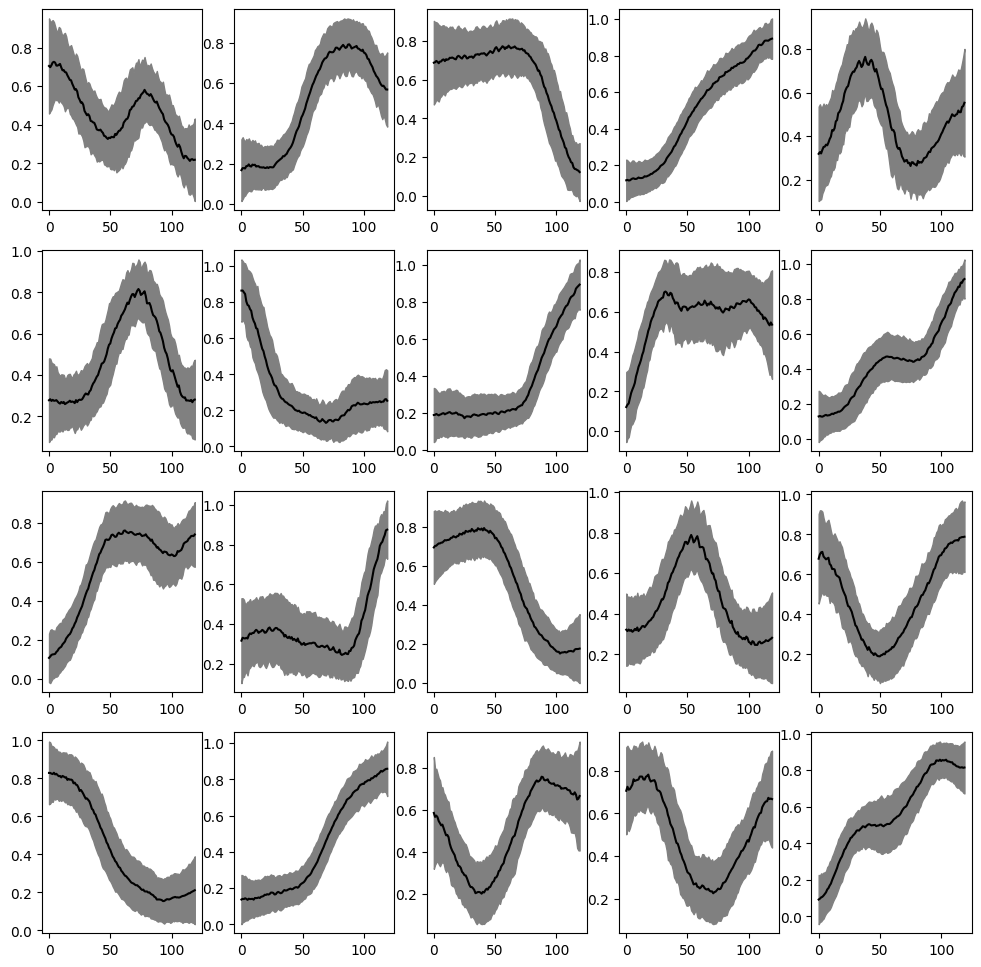

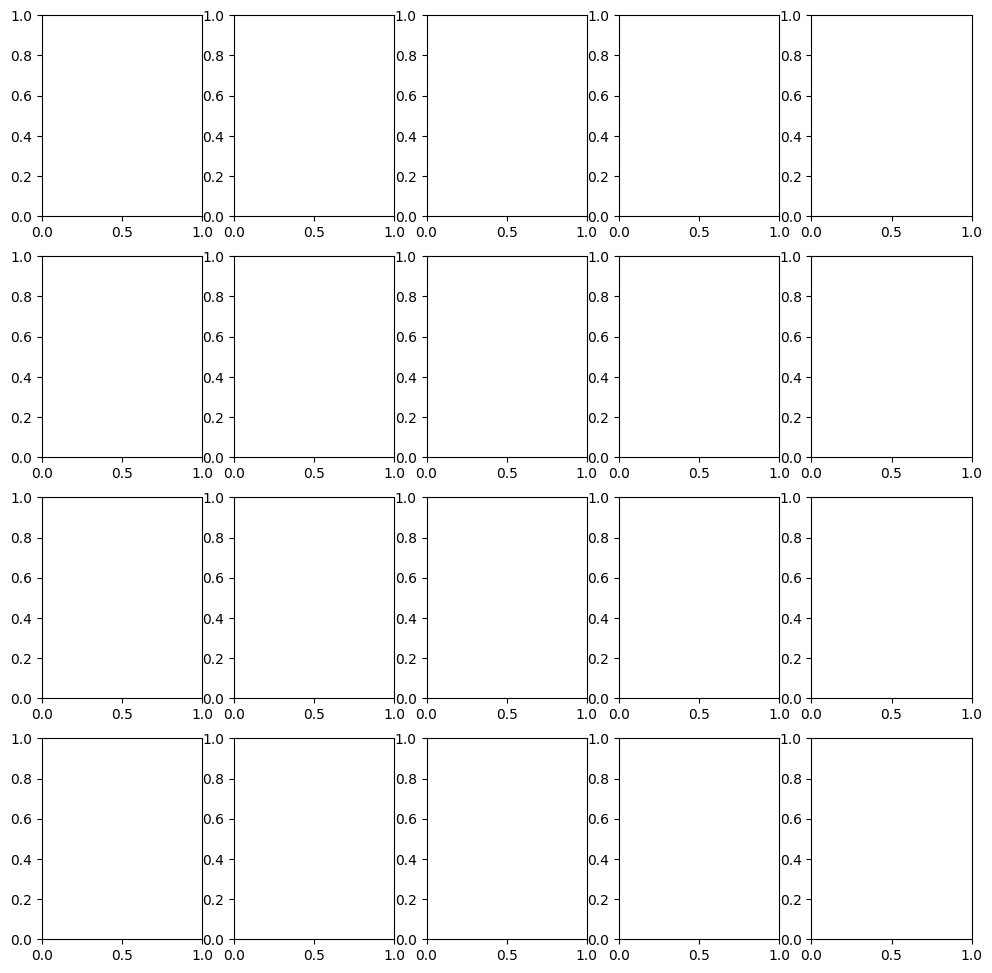

In [19]:
dim_H = int(math.sqrt(num_clusters))
dim_W = math.ceil(num_clusters/int(math.sqrt(num_clusters)))
fig_price, axes_price = plt.subplots(dim_H, dim_W, figsize=(12, 12))
axs_price = axes_price.flatten()
fig_vol, axes_vol = plt.subplots(dim_H, dim_W, figsize=(12, 12))
axs_vol = axes_vol.flatten()

for j in range(num_clusters): # range(num_clusters):
	slice_array_label = np.take(slice_array, np.where(labels==j)[0].astype(int), 0)
	column_mean = slice_array_label.mean(axis=0)
	column_std = slice_array_label.std(axis=0)
	axs_price[j].plot(range(0,120),column_mean[:, 0],color='black')
	axs_price[j].fill_between(range(0,120), column_mean[:, 0]-column_std[:, 0], column_mean[:, 0]+column_std[:, 0],color='grey')
	#axs_vol[j].plot(range(0,120),column_mean[:, 1],color='black')
	#axs_vol[j].fill_between(range(0,120), column_mean[:, 1]-column_std[:, 1], column_mean[:, 1]+column_std[:, 1],color='grey')

plt.show()

# for j in range(num_clusters): # range(num_clusters):
# 	df_window_label = df_window.iloc[:, np.where(labels==j)[0].astype(int)]
# 	column_mean = df_window_label.mean(axis=1)
# 	column_std = df_window_label.std(axis=1)
# 	axs[j].plot(range(0,120),column_mean,color='black') # label=f'Cluster {i+1}'
# 	axs[j].plot(range(0,120),column_mean-column_std,color='grey') # label=f'Cluster {i+1}'
# 	axs[j].plot(range(0,120),column_mean+column_std,color='grey') # label=f'Cluster {i+1}'
# 	axs[j].fill_between(range(0,120), column_mean-column_std, column_mean+column_std,color='grey')

# plt.show()

	# for i in np.where(labels==j)[0]: 
	#     #for i in group_array:
	# #group_array
	#     #print(i)


	#     #plt.plot(range(0,120),slice_data[i] ,color=colors[j]) # label=f'Cluster {i+1}'
	#     plt.plot(range(0,120),slice_data[i].mean() ,color='black') # label=f'Cluster {i+1}'
	# plt.show()